|名称|含义|取值|
|---|---|---|
|id|ID|整数|
|diagnosis|乳腺组织的诊断结果|M=恶性，B=良性|
|radius_mean|从中心到周边的距离|float|
|texture_mean|灰度值|float|
|perimeter_mean|核心肿瘤的大小|float|
|area_mean|面积的大小|float|
|smoothness_mean|半径长度局部变化|float|
|compactness_mean|周长平均值^ 2 /面积 - 1.0|float|
|concavity_mean|轮廓凹部严重程度|float|
|concave points_mean|轮廓凹部的数量|float|
|symmetry_mean|对称|float|
|fractal_dimension_mean|“海岸线近似”|float|
|radius_se|从中心到周长点的距离的标准差|float|
|texture_se|灰度值的标准差|float|
|perimeter_se|周长标准差|float|
|area_se|面积标准差|float|
|smoothness_se|半径长度局部变化的标准差|float|
|compactness_se|“海岸线近似”的标准差 - 1|float|
|concavity_se|轮廓凹部数量的标准差|float|
|concave points_se|轮廓凹部数量的标准差|float|
|symmetry_se|对称标准差|float|
|fractal_dimension_se|“海岸线近似”的标准差 - 1|float|
|radius_worst|从中心到周边点的距离平均值的“最差”或最大平均值|float|
|texture_worst||float|
|perimeter_worst||float|
|area_worst||float|
|smoothness_worst||float|
|compactness_worst||float|
|concavity_worst||float|
|concave points_worst||float|
|symmetry_worst||float|
|fractal_dimension_worst||float|

# 1.导入包和数据预处理

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split   #切分数据 
from sklearn.cross_validation import KFold             #交叉检验
from sklearn.preprocessing import MinMaxScaler         #归一化
from sklearn.preprocessing import Normalizer           #正规化
from sklearn.preprocessing import  StandardScaler      #标准化
from sklearn.model_selection import GridSearchCV       #调参

from sklearn.decomposition import PCA                #主成分分析
from sklearn.feature_selection import RFE            #递归特征消除


from sklearn.linear_model import LogisticRegression  #逻辑回归   
from sklearn.ensemble import RandomForestClassifier  #随机森林
from sklearn.neighbors import KNeighborsClassifier   #KNN
from sklearn.tree import DecisionTreeClassifier      #决策树
from sklearn import svm                              #SVM

from sklearn import metrics                            #检验模型误差和精准率


/Users/kyzhang/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#检测文件
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

data.csv



In [3]:
#读取文件
data = pd.read_csv("../input/data.csv",header=0)

In [4]:
#观察前5行
data.head(5) 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.shape

(569, 33)

In [6]:
#去掉"Unnamed: 32"列
data.drop("Unnamed: 32",axis=1,inplace=True) 

In [7]:
#去掉ID列
data.drop("id",axis=1,inplace=True)

In [8]:
#数值化诊断结果
data.diagnosis = data.diagnosis.map({"M":1, "B":0})
#data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

In [9]:
#把数据化为三部分

#索引
features = list(data.columns[1:31])
features_mean = list(data.columns[1:11])
features_se = list(data.columns[11:20])
features_worst =list(data.columns[21:31])


#数据
target  = data.diagnosis
data_ft = data[features]
data_mean = data[features_mean]    
data_se = data[features_se]
data_worst = data[features_worst]

print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


# 2.探索性数据分析

In [10]:
#数据统计
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


###  2.1 数据可视化

Number of Benign:  357
Number of Malignant :  212


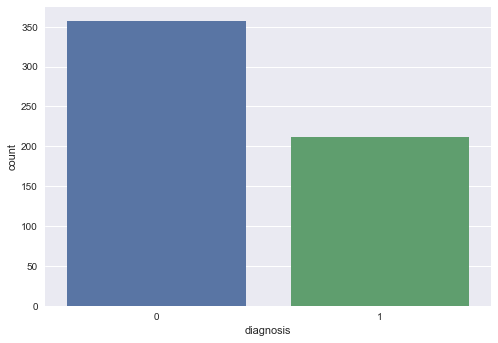

In [11]:
sns.countplot(target,label="Count")
B, M = target.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

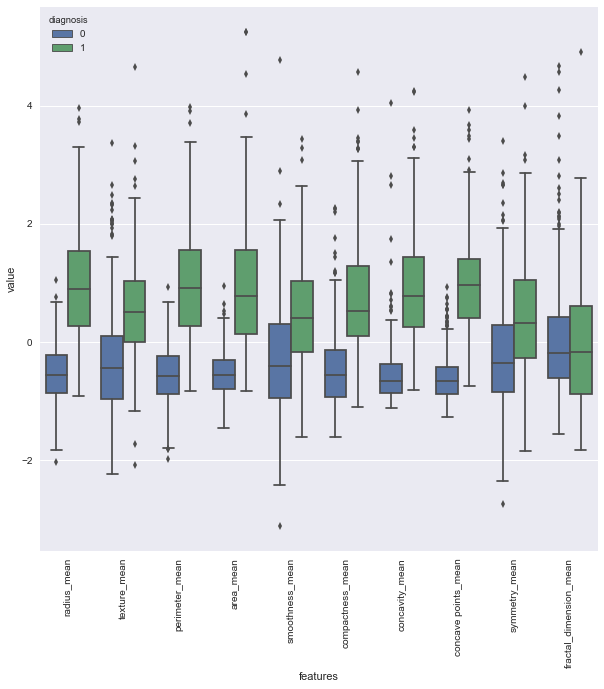

In [12]:
#箱型图
data_dia = target
data_a = data_ft
data_n_2 = (data_a - data_a.mean()) / (data_a.std())              # 标准化
data_a = pd.concat([target,data_n_2.iloc[:,0:10]],axis=1)
data_a = pd.melt(data_a,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data_a)
plt.xticks(rotation=90)

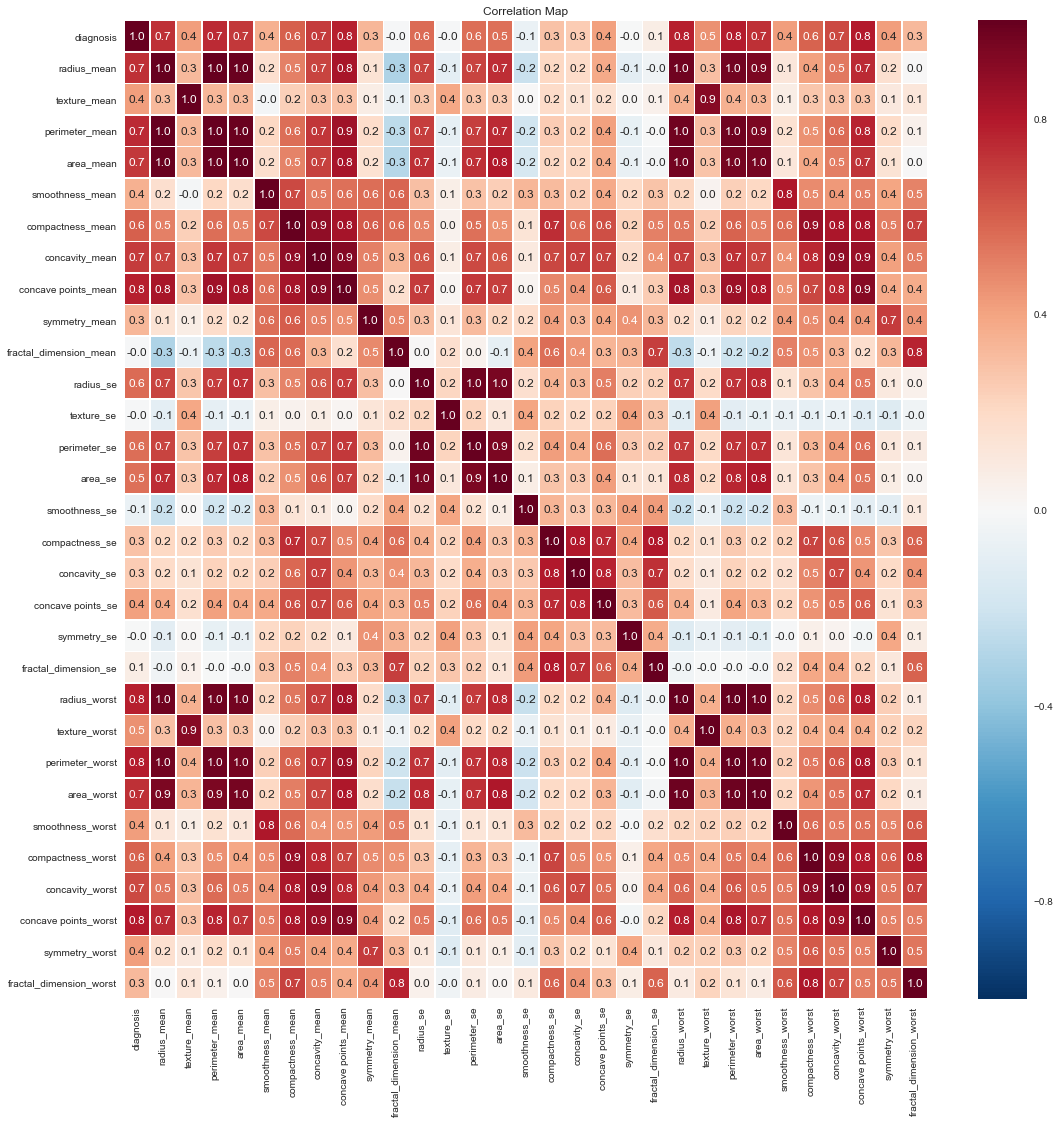

In [13]:
#热图
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

### 2.2 特征选择

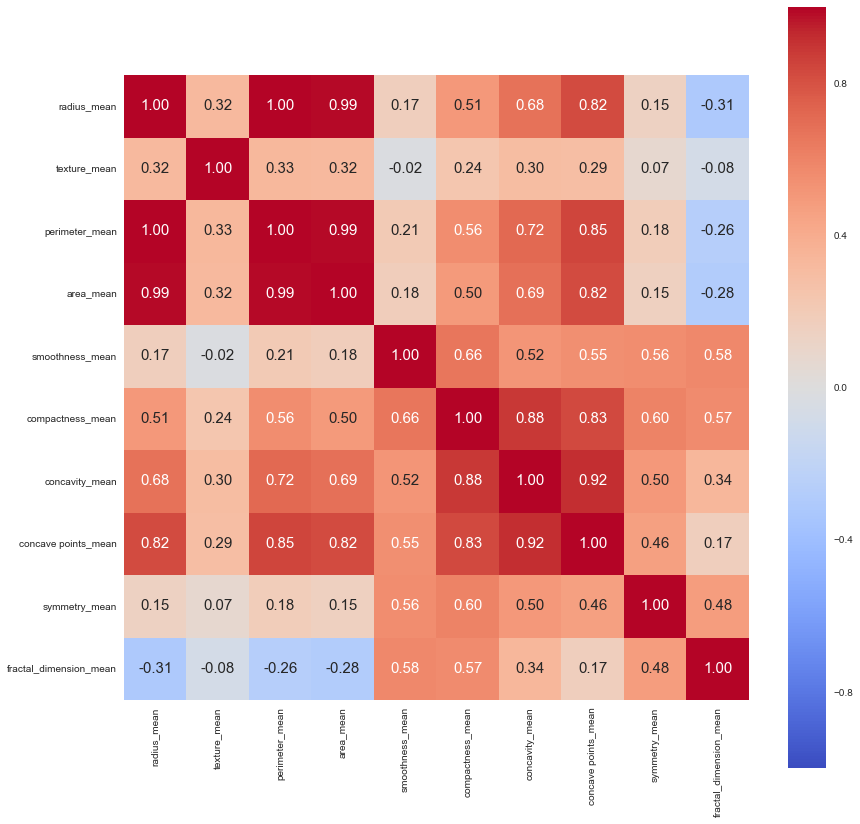

In [14]:
corr = data[features_mean].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,cbar = True,square=True,annot=True,fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean, cmap= 'coolwarm')

+ radius, parimeter and area 相关度很高，用其中一个
+ compactness_mean, concavity_mean and concavepoint_mean高度相关，我们使用compactness_mean
+ 最终使用perimeter_mean, texture_mean, compactness_mean,smoothness_mean， symmetry_mean  

In [ ]:
#第一次用于预测的变量
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

# 3. 建模

### 3.1 处理数据集

In [16]:
#切分数据
random_state=42
train,test = train_test_split(data,test_size=0.3, random_state=random_state)
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [17]:
#划分训练数据和训练结果
train_X = train[prediction_var]
train_y = train["diagnosis"]
#划分测试数据和测试结果
test_X = test[prediction_var]
test_y = test["diagnosis"]

### 3.2 使用SVM和随机森林试验性

In [18]:
#随机森林
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
pred_y = model.predict(test_X)
print("RF","-ACC:",metrics.accuracy_score(test_y,pred_y))     # 准确率
print("RF","-REC:",metrics.recall_score(test_y,pred_y))       # 召回率
print("RF","-F1:",metrics.f1_score(test_y,pred_y))            # 综合率

SVM -ACC: 0.959064327485
SVM -REC: 0.936507936508
SVM -F1: 0.944


In [19]:
#特征贡献度排名
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp)

perimeter_mean      0.490983
compactness_mean    0.204041
texture_mean        0.151514
smoothness_mean     0.085360
symmetry_mean       0.068102
dtype: float64


In [20]:
#SVM
model = svm.SVC()
model.fit(train_X,train_y)
pred_y = model.predict(test_X)
print("SVM","-ACC:",metrics.accuracy_score(test_y,pred_y))     # 准确率
print("SVM","-REC:",metrics.recall_score(test_y,pred_y))       # 召回率
print("SVM","-F1:",metrics.f1_score(test_y,pred_y))            # 综合率

SVM -ACC: 0.923976608187
SVM -REC: 0.873015873016
SVM -F1: 0.894308943089


**转换为所有mean特征**

In [21]:
prediction_var = features_mean

In [22]:
#划分训练数据和训练结果
train_X = train[prediction_var]
train_y = train["diagnosis"]
#划分测试数据和测试结果
test_X = test[prediction_var]
test_y = test["diagnosis"]

In [23]:
#随机森林
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
pred_y = model.predict(test_X)
print("RF","-ACC:",metrics.accuracy_score(test_y,pred_y))     # 准确率
print("RF","-REC:",metrics.recall_score(test_y,pred_y))       # 召回率
print("RF","-F1:",metrics.f1_score(test_y,pred_y))            # 综合率

RF -ACC: 0.953216374269
RF -REC: 0.952380952381
RF -F1: 0.9375


In [24]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp)

concave points_mean       0.252161
concavity_mean            0.201479
perimeter_mean            0.157097
area_mean                 0.120168
radius_mean               0.102604
texture_mean              0.062276
compactness_mean          0.032739
smoothness_mean           0.029748
fractal_dimension_mean    0.024820
symmetry_mean             0.016908
dtype: float64


In [25]:
#SVM
model = svm.SVC()
model.fit(train_X,train_y)
pred_y = model.predict(test_X)
print("SVM","-ACC:",metrics.accuracy_score(test_y,pred_y))     # 准确率
print("SVM","-REC:",metrics.recall_score(test_y,pred_y))       # 召回率
print("SVM","-F1:",metrics.f1_score(test_y,pred_y))            # 综合率

SVM -ACC: 0.678362573099
SVM -REC: 0.206349206349
SVM -F1: 0.320987654321


**更换特征**

In [26]:
prediction_var = ["concave points_mean","perimeter_mean","concavity_mean","area_mean","radius_mean"]

In [27]:
#划分训练数据和训练结果
train_X = train[prediction_var]
train_y = train["diagnosis"]
#划分测试数据和测试结果
test_X = test[prediction_var]
test_y = test["diagnosis"]

In [28]:
#随机森林
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
pred_y = model.predict(test_X)
print("RF","-ACC:",metrics.accuracy_score(test_y,pred_y))     # 准确率
print("RF","-REC:",metrics.recall_score(test_y,pred_y))       # 召回率
print("RF","-F1:",metrics.f1_score(test_y,pred_y))            # 综合率

RF -ACC: 0.918128654971
RF -REC: 0.888888888889
RF -F1: 0.888888888889


In [29]:
#SVM
model = svm.SVC()
model.fit(train_X,train_y)
pred_y = model.predict(test_X)
print("SVM","-ACC:",metrics.accuracy_score(test_y,pred_y))     # 准确率
print("SVM","-REC:",metrics.recall_score(test_y,pred_y))       # 召回率
print("SVM","-F1:",metrics.f1_score(test_y,pred_y))            # 综合率

SVM -ACC: 0.730994152047
SVM -REC: 0.333333333333
SVM -F1: 0.477272727273


**更改特征为features_worst**

In [30]:
prediction_var = features_worst

In [31]:
#划分训练数据和训练结果
train_X = train[prediction_var]
train_y = train["diagnosis"]
#划分测试数据和测试结果
test_X = test[prediction_var]
test_y = test["diagnosis"]

In [32]:
#随机森林
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
pred_y = model.predict(test_X)
print("RF","-ACC:",metrics.accuracy_score(test_y,pred_y))     # 准确率
print("RF","-REC:",metrics.recall_score(test_y,pred_y))       # 召回率
print("RF","-F1:",metrics.f1_score(test_y,pred_y))            # 综合率

RF -ACC: 0.953216374269
RF -REC: 0.936507936508
RF -F1: 0.936507936508


In [33]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp)

concave points_mean       0.292068
concavity_mean            0.202791
perimeter_mean            0.137606
area_mean                 0.109640
radius_mean               0.103402
texture_mean              0.058866
compactness_mean          0.033129
smoothness_mean           0.026048
fractal_dimension_mean    0.018446
symmetry_mean             0.018004
dtype: float64


In [34]:
#SVM
model = svm.SVC()
model.fit(train_X,train_y)
pred_y = model.predict(test_X)
print("SVM","-ACC:",metrics.accuracy_score(test_y,pred_y))     # 准确率
print("SVM","-REC:",metrics.recall_score(test_y,pred_y))       # 召回率
print("SVM","-F1:",metrics.f1_score(test_y,pred_y))            # 综合率

SVM -ACC: 0.678362573099
SVM -REC: 0.206349206349
SVM -F1: 0.320987654321


In [35]:
prediction_var = ["perimeter_worst","concave points_worst","area_worst","radius_worst","concavity_worst"]

In [36]:
#划分训练数据和训练结果
train_X = train[prediction_var]
train_y = train["diagnosis"]
#划分测试数据和测试结果
test_X = test[prediction_var]
test_y = test["diagnosis"]

In [37]:
#随机森林
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
pred_y = model.predict(test_X)
print("RF","-ACC:",metrics.accuracy_score(test_y,pred_y))     # 准确率
print("RF","-REC:",metrics.recall_score(test_y,pred_y))       # 召回率
print("RF","-F1:",metrics.f1_score(test_y,pred_y))            # 综合率

RF -ACC: 0.947368421053
RF -REC: 0.920634920635
RF -F1: 0.928


In [38]:
#SVM
model = svm.SVC()
model.fit(train_X,train_y)
pred_y = model.predict(test_X)
print("SVM","-ACC:",metrics.accuracy_score(test_y,pred_y))     # 准确率
print("SVM","-REC:",metrics.recall_score(test_y,pred_y))       # 召回率
print("SVM","-F1:",metrics.f1_score(test_y,pred_y))            # 综合率

SVM -ACC: 0.643274853801
SVM -REC: 0.126984126984
SVM -F1: 0.207792207792


### 3.3 交叉检验

In [39]:
def model(model,data,prediction,outcome):
    kf = KFold(data.shape[0], n_folds=10)

In [40]:
prediction_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']

In [41]:
def classification_model(model,data,prediction_input,output):
    model.fit(data[prediction_input],data[output])
    predictions = model.predict(data[prediction_input])
    print("model"," Accuracy  :",metrics.accuracy_score(predictions,data[output]))     # 准确率
    print("model"," Recall  :",metrics.recall_score(predictions,data[output]))       # 召回率
    print("model"," F1-score:",metrics.f1_score(predictions,data[output]))            # 综合率
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        train_X = (data[prediction_input].iloc[train,:])
        train_y = data[output].iloc[train]
        model.fit(train_X, train_y)
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

In [42]:
#决策树
model = DecisionTreeClassifier()
outcome_var= "diagnosis"
classification_model(model,data,prediction_var,outcome_var)

model  Accuracy  : 1.0
model  Recall  : 1.0
model  F1-score: 1.0
Cross-Validation Score : 85.965%
Cross-Validation Score : 86.842%
Cross-Validation Score : 88.596%
Cross-Validation Score : 89.693%
Cross-Validation Score : 89.984%


In [43]:
#SVM
model = svm.SVC()

classification_model(model,data,prediction_var,outcome_var)

model  Accuracy  : 0.966608084359
model  Recall  : 0.975369458128
model  F1-score: 0.95421686747
Cross-Validation Score : 56.140%
Cross-Validation Score : 65.789%
Cross-Validation Score : 69.883%
Cross-Validation Score : 72.807%
Cross-Validation Score : 74.706%


In [44]:
#KNN
model = KNeighborsClassifier()
classification_model(model,data,prediction_var,outcome_var)

model  Accuracy  : 0.905096660808
model  Recall  : 0.920212765957
model  F1-score: 0.865
Cross-Validation Score : 76.316%
Cross-Validation Score : 80.263%
Cross-Validation Score : 85.965%
Cross-Validation Score : 86.623%
Cross-Validation Score : 86.820%


In [45]:
#RF
model = RandomForestClassifier(n_estimators=100)
classification_model(model,data,prediction_var,outcome_var)

model  Accuracy  : 1.0
model  Recall  : 1.0
model  F1-score: 1.0
Cross-Validation Score : 84.211%
Cross-Validation Score : 87.281%
Cross-Validation Score : 90.351%
Cross-Validation Score : 91.447%
Cross-Validation Score : 91.742%


In [46]:
#LR
model=LogisticRegression()
classification_model(model,data,prediction_var,outcome_var)

model  Accuracy  : 0.892794376098
model  Recall  : 0.908108108108
model  F1-score: 0.846347607053
Cross-Validation Score : 78.070%
Cross-Validation Score : 82.018%
Cross-Validation Score : 86.550%
Cross-Validation Score : 87.939%
Cross-Validation Score : 89.112%


### 3.4 网格搜索

In [75]:
#赋值
data_X = data[prediction_var]
data_y = data["diagnosis"]
print(data_X.shape)
print(data_y.shape)

(569, 5)
(569,)


In [48]:
#定义网格搜索函数
def Classification_model_gridsearchCV(model,param_grid,data_X,data_y):
    clf = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")    
    #model:模型
    #param_grid：参数
    #CV：交叉检验
    #scoring：评分
    clf.fit(train_X,train_y)  
    print("The best parameter found on development set is :")
    print(clf.best_params_)
    print("----------------------------------------------")
    print("the best estimator is ")
    print(clf.best_estimator_)
    print("----------------------------------------------")
    print("The best score is ")
    print(clf.best_score_)

In [49]:
#Logistic回归
model = LogisticRegression()
param_grid = {
              'max_iter': [1,2,3,4,5,6,7,8,9,10], 
              'C' : [0.001, 0.01, 0.1, 1, 11,10,15,20, 100, 1000],
              'penalty' : ['l2','l1']
             }
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The best parameter found on development set is :
{'C': 10, 'max_iter': 10, 'penalty': 'l1'}
----------------------------------------------
the best estimator is 
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
----------------------------------------------
The best score is 
0.957286432161


In [50]:
#决策树
model= DecisionTreeClassifier()

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The best parameter found on development set is :
{'max_features': 'auto', 'min_samples_leaf': 9, 'min_samples_split': 10}
----------------------------------------------
the best estimator is 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
----------------------------------------------
The best score is 
0.947236180905


In [51]:
#KNN
model = KNeighborsClassifier()

k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
param_grid = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The best parameter found on development set is :
{'leaf_size': 1, 'n_neighbors': 23, 'weights': 'uniform'}
----------------------------------------------
the best estimator is 
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')
----------------------------------------------
The best score is 
0.907035175879


In [52]:
#SVM
model = svm.SVC()

param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              },
 ]
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The best parameter found on development set is :
{'C': 100, 'kernel': 'linear'}
----------------------------------------------
the best estimator is 
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
----------------------------------------------
The best score is 
0.93216080402


In [55]:
#随机森林
model = RandomForestClassifier()

param_grid = {'n_estimators': [100,200],
              'min_samples_split': [20,25,30], 
              'max_depth':[6,7,8],
              'max_features':[1,2,3],
             }
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The best parameter found on development set is :
{'max_depth': 8, 'max_features': 1, 'min_samples_split': 25, 'n_estimators': 100}
----------------------------------------------
the best estimator is 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=25,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------------------------------------------
The best score is 
0.949748743719


**使用全部mean特征**

In [74]:
#赋值
data_X = data[features_mean]
data_y = data["diagnosis"]
print(data_X.shape)
print(data_y.shape)

(569, 10)
(569,)


In [65]:
#Logistic回归
model = LogisticRegression()
param_grid = {
              'max_iter': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,20,40], 
              'C' : [0.001, 0.01, 0.1, 1, 9,10,11,12,15,20, 100, 1000],
              'penalty' : ['l2','l1']
             }
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The best parameter found on development set is :
{'C': 9, 'max_iter': 15, 'penalty': 'l1'}
----------------------------------------------
the best estimator is 
LogisticRegression(C=9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=15, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
----------------------------------------------
The best score is 
0.957286432161


In [61]:
#随机森林
model = RandomForestClassifier()

param_grid = {'n_estimators': [100],
              'min_samples_split': [25,30], 
              'max_depth':[6,7,8,9],
              'max_features':[1,2,3,4,5],
             }
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The best parameter found on development set is :
{'max_depth': 6, 'max_features': 1, 'min_samples_split': 25, 'n_estimators': 100}
----------------------------------------------
the best estimator is 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=25,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------------------------------------------
The best score is 
0.949748743719


**使用全部特征**

In [73]:
#赋值
data_X = data[features]
data_y = data["diagnosis"]
print(data_X.shape)
print(data_y.shape)

(569, 30)
(569,)


In [67]:
#Logistic回归
model = LogisticRegression()
param_grid = {
              'max_iter': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,20,40], 
              'C' : [0.001, 0.01, 0.1, 1, 9,10,11,12,15,20, 100, 1000],
              'penalty' : ['l2','l1']
             }
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The best parameter found on development set is :
{'C': 9, 'max_iter': 12, 'penalty': 'l1'}
----------------------------------------------
the best estimator is 
LogisticRegression(C=9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=12, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
----------------------------------------------
The best score is 
0.957286432161


In [63]:
#随机森林
model = RandomForestClassifier()

param_grid = {'n_estimators': [100],
              'min_samples_split': [25,30], 
              'max_depth':[6,7,8,9],
              'max_features':[1,2,3,4,5],
             }
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The best parameter found on development set is :
{'max_depth': 6, 'max_features': 4, 'min_samples_split': 25, 'n_estimators': 100}
----------------------------------------------
the best estimator is 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=25,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------------------------------------------
The best score is 
0.947236180905
